In [1]:
!pip install ucimlrepo
import numpy as np
import pandas as pd



# Wstęp
## Cel ćwiczenia
W tym notebooku głównym celem jest żeby poprawnie przeprowadzić "standardowe" ML flow i przypomnieć sobie/ popracować z biblotekami sklearn, numpy, pandas.
Zadanie będzie wymagało zrobienia Exploratory Data Analysis, a następnie na jej podstawie wykonania preprocessingu danych oraz puszczenie modelu.

### Ogólne informacje do zadania:
#### 1. Zbiór danych
czyli to na czym będziemy pracowac w tym zadaniu. Jest to zbiór [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing), na którym do wykonania jest zadanie z klasyfikacji tak jak opisane w repozytorium. Polecam skorzystać z `ucimlrepo` aby go zainstalować.



#### 2. EDA

czyli poznaj swoje dane, a przede wszystkim oceń ich jakość. Potraktuj ten etap jako upewnienie się, że to, co wejdzie do Twojego modelu, jest „czyste” i nie zawiera żadnych niespodziewanych wartości w poszczególnych kolumnach  takich, które w najlepszym przypadku zwróciłyby błąd, a w najgorszym doprowadziły do wytrenowania słabego modelu.
Pamiętaj: *Garbage in, garbage out.* Z pustego nawet Salomon nie naleje, nieważne jak bardzo będziemy dobierać hiperparametry.
Poniżej kilka pomocniczych pytań, które mogą naprowadzić, co należy sprawdzić i na co uważać na etapie EDA:

* czy dane załadowały się prawidłowo
* czy typy kolumn odpowiadają ich zawartości; czy potrzebujemy zmienić typ (np. wiek powinien być w `int`, a nie w typie „object”)
* czy mamy brakujące wartości w jakichś kolumnach- jeśli tak, to co z nimi robimy (usuwamy wiersze? kolumny? uzupełniamy brak?); jeśli uzupełniamy, to w jaki sposób, by było to optymalne. Istnieje kilka prostych metod (mediana, moda, średnia), ale w praktyce coraz częściej korzysta się z bardziej zaawansowanych imputerów (KNN Imputer, MICE itp.)
* czy brakująca wartość to zawsze Null/NaN? Czy dataset może używać innych znaczników braków (np. „?”, „missing”, „-999”)?
* czy wartości w kolumnach mają sens (ujemny wiek, BMI równe 0 itp.) i jak je traktować
* jak wyglądają rozkłady wartości kolumn, czy takich rozkładów się spodziewaliśmy
* czy mamy wartości odstające? Jeśli tak, to czy wynikają one z błędów (np. wzrost człowieka 18.0 m, źle wstawiony przecinek), czy mogą być prawdopodobne w prawdziwym świecie (np. miesięczny zarobek 500 tys. zł)? Co zrobić z takimi outlierami? Jak je wykryć (np. IQR, Z-score, Isolation Forest)?
* czy mamy kolumny wysoko skorelowane ze sobą; czy taka korelacja jest dla naszego modelu korzystna czy szkodliwa; jak ją zwizualizować (np. heatmapa); jak ją rozwiązać (np. usunięcie jednej z kolumn, PCA)
* czy format naszych danych jest „model-friendly”? Czy musimy zastosować jakieś kodowanie zmiennych (np. one-hot encoding, target encoding)?
* czy powinniśmy standaryzować / normalizować dane? Kiedy warto zastosować jedno, a kiedy drugie? Czy są przypadki, gdzie nie należy tego robić, a takie, gdzie jest to absolutnie konieczne?
* czy są kolumny, które na pewno usuniemy, bo nic nie wniosą do modelu albo mogą mu szkodzić (np. ID, kolumny z dużą liczbą unikalnych wartości bez znaczenia semantycznego)
* czy między naszymi danymi zachodzi jakaś istotna statystycznie zależność? Jeśli tak, to wykonajmy testy statystyczne, aby to potwierdzić (np. chi-kwadrat dla zmiennych kategorycznych, ANOVA, testy normalności, testy na homogeniczność wariancji)

Oczywiście nie musicie odpowiadać na wszystkie te pytania, bo nie każdy zbiór będzie wymagał rozwiązywania wszystkich problemów. Warto jednak pamiętać, że zbiór danych to fundament- jego zrozumienie może tylko pomóc w zaprojektowaniu dobrego modelu.

#### 3. Modelowanie

czyli należy wykorzystać ładnie przygotowane dane do zbudowania modelu. Wiadomo, że istnieją modele, które często zapewniają wysokie metryki już „z natury”, np. XGBoost. Warto jednak wziąć pod uwagę, że:

* nie ma co strzelać z armaty do komara- nie bierz XGBoosta, jeśli problem sensownie rozwiązuje regresja logistyczna
* im bardziej interpretowalny model, tym lepiej- zarówno przy dalszym rozwijaniu, jak i przy próbie wdrażania go w systemach produkcyjnych
* przy mniejszych zbiorach trenowanie trwa szybko, więc warto przetestować różne typy modeli i różne konfiguracje hiperparametrów
* wyciek wiedzy (*data leakage*) to jedno z największych ryzyk- kluczowe jest upewnienie się, że żadna informacja z przyszłości (np. ze zbioru testowego, albo z kolumn pochodnych) nie trafi do części treningowej
* w większości modeli mamy co najmniej kilka hiperparametrów, które mogą znacząco wpłynąć na jakość predykcji; powinniśmy je przetestować i dobrać tak, by model osiągał jak najlepsze wyniki
* najbezpieczniej jest używać cross-walidacji- i to na niej dobierać hiperparametry
* obliczenie wielu metryk nie zaszkodzi, natomiast musimy jasno zdefiniować, która metryka jest najważniejsza z perspektywy celu zadania (accuracy? recall? precision? AUC? MAE?)




## **KROKI DO WYKONANIA ZADANIA- minimalny zakres prac (EDA + Modelowanie)**

To zadanie jest wyjątkowo otwarte i można je wykonać na wiele sposobów, w zależności od kreatywności i podejścia. Natomiast istnieje **pewne minimum**, na którym na pewno trzeba się skupić, aby zadanie zostało zaliczone


**EDA (Exploratory Data Analysis)**

* sprawdzenie brakujących danych oraz- jeśli będzie potrzeba- ich uzupełnienie odpowiednią metodą
* sprawdzenie wartości odstających i decyzja, co z nimi zrobić (usunąć, poprawić, zostawić)
* sprawdzenie rozkładów **zmiennej decyzyjnej** oraz najważniejszych zmiennych wejściowych
* zbadanie, jak dokładnie zformatować dane, aby model mógł je poprawnie przyjąć (np. typy danych, kodowanie zmiennych, standaryzacja)
* zbadanie zależności między zmiennymi (np. korelacje, testy statystyczne, analiza współzależności)
* zadbanie o warstwę wizualną tam, gdzie jest to możliwe i pomocne (wykresy, heatmapy, histogramy, boxploty itp.)
* krótki wniosek po EDA- co możemy powiedzieć o danych, co w nich odkryliśmy, jakie są istotne problemy i na co należy uważać podczas modelowania


**MODELOWANIE**

* wybranie minimum **3 różnych modeli** reprezentujących różne rodziny (np. regresja logistyczna, drzewa, modele ensemble, SVM, sieć neuronowa)
* dla każdego modelu sprawdzenie minimum **2 hiperparametrów** (dobieranych na zbiorze walidacyjnym)
* dobór hiperparametrów wykonany za pomocą mechanizmu **cross-walidacji**
* sprawdzenie ostatecznych wyników na **zbiorze testowym**, po zakończeniu strojenia hiperparametrów
* użycie techniki SHAP na dowolnym wytrenowanym modelu w celu zbadania wyjaśnialności- wybrać minimum jeden przykład poprawnej predykcji oraz jeden przykład błędnej, a następnie je zbadać.
* czytelna prezentacja wyników i metryk (tabela porównawcza, wykresy, krótki komentarz)
* wnioski i konkluzje z eksperymentu- który model działa najlepiej, dlaczego, jakie są ograniczenia, co można poprawić

**WAŻNE UWAGI DO ZADANIA**

* Pamiętajcie, że analizę zbioru wykonujemy na **całym dostępnym zbiorze danych**. **Natomiast** kiedy przechodzimy do transformacji zbioru danych (standaryzacja, uzupełnianie brakujących danych itp.), wykonujemy ją **wyłącznie na podstawie rozkładu zbioru *trenującego***.
  Przykładowo: parametry używane do standaryzacji kolumn obliczamy na zbiorze trenującym, a następnie stosujemy je do zbioru walidacyjnego i testowego. W przeciwnym przypadku dochodzi do **wycieku wiedzy** (więcej informacji w materiałach dodatkowych).

* Biblioteka `sklearn` jest dobrze przystosowana do takiego scenariusza dzięki wykorzystaniu tzw. obiektów **Pipeline**. Użycie ich nie jest wymagane, ale może ułatwić pisanie kodu oraz pomóc w uniknięciu wycieku wiedzy.

* Do wykonania zadania powinny wystarczyć standardowe biblioteki pythonowe, wymienione poniżej. Oczywiście nie trzeba się do nich ograniczać — można korzystać również z innych:

  * **sklearn** – podstawowa biblioteka do ML w Pythonie. Posiada prosty i intuicyjny interfejs i zawiera większość potrzebnych operacji.
  * **pandas** – do operacji na danych tabelarycznych.
  * **matplotlib / seaborn** – do wizualizacji.
  * **numpy** – do obliczeń i transformacji matematycznych (większość kluczowych bibliotek opiera się na NumPy).
  * **statistics** – operacje statystyczne.


Dodatkowe materiały:
- [modele w sklearnie](https://scikit-learn.org/stable/supervised_learning.html)
- [jeden z tutorialów do EDA](https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6)
- [co to wyciek danych](https://www.ibm.com/think/topics/data-leakage-machine-learning)
- [niezbalansowane dane](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)
- [wyjaśnialność za pomocą SHAP-a](https://shap.readthedocs.io/en/latest/)
- [brakujące wartości](https://medium.com/@ajayverma23/data-imputation-a-comprehensive-guide-to-handling-missing-values-b5c7d11c3488)
- [wizualizacja wielowymiarowych danych w 2D](https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb)
- [wartości odstające](https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/)
- [cross validacja](https://scikit-learn.org/stable/modules/cross_validation.html)
- [pipelines w sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- cała dokumentacja sklerana

In [2]:
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)

print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
#zapomnialam ze zaczyna sie z test a nie pozniej, welp
#ZNOWU

In [4]:
bank_marketing_df = pd.concat([X, y], axis=1)
bank_marketing_df.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no


In [5]:
def get_percentage_missing(df, axis):
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

missing_cols_mi = get_percentage_missing(bank_marketing_df, axis=0)
missing_cols_mi

,0
job,0.64
education,4.11
contact,28.80
poutcome,81.75


In [6]:
bank_marketing_df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [7]:
print(f"Min: {bank_marketing_df['balance'].min()}")
print(f"Max: {bank_marketing_df['balance'].max()}")
#jestem prostym czlowiekiem sprawdzma  tak
#aczkolwiek wlasnie nanmy problem jak widac mozna miec ujemne konto az na 8000

Min: -8019
Max: 102127


In [8]:
bank_marketing_df['fin_problems'] = (bank_marketing_df['balance'] < 0).astype(int)

In [9]:
bank_marketing_df = bank_marketing_df.convert_dtypes()
bank_marketing_df.dtypes

,0
age,Int64
job,string[python]
marital,string[python]
education,string[python]
default,string[python]
balance,Int64
housing,string[python]
loan,string[python]
contact,string[python]
day_of_week,Int64


In [10]:
bank_marketing_df.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,fin_problems
0,58,management,married,tertiary,no,2143,yes,no,<NA>,5,may,261,1,-1,0,<NA>,no,0
1,44,technician,single,secondary,no,29,yes,no,<NA>,5,may,151,1,-1,0,<NA>,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,<NA>,5,may,76,1,-1,0,<NA>,no,0
3,47,blue-collar,married,<NA>,no,1506,yes,no,<NA>,5,may,92,1,-1,0,<NA>,no,0
4,33,<NA>,single,<NA>,no,1,no,no,<NA>,5,may,198,1,-1,0,<NA>,no,0
5,35,management,married,tertiary,no,231,yes,no,<NA>,5,may,139,1,-1,0,<NA>,no,0
6,28,management,single,tertiary,no,447,yes,yes,<NA>,5,may,217,1,-1,0,<NA>,no,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,<NA>,5,may,380,1,-1,0,<NA>,no,0


In [11]:

#trzeba wszystkow  inta :(
kolumny_do_konwersji = ['loan', 'housing', 'default', 'y']
bank_marketing_df[kolumny_do_konwersji] = bank_marketing_df[kolumny_do_konwersji].replace({'yes': '1', 'no': '0'})
bank_marketing_df[kolumny_do_konwersji] = bank_marketing_df[kolumny_do_konwersji].astype(int)
bank_marketing_df.dtypes

,0
age,Int64
job,string[python]
marital,string[python]
education,string[python]
default,int64
balance,Int64
housing,int64
loan,int64
contact,string[python]
day_of_week,Int64


In [12]:
bank_marketing_df['loan'].unique()

array([0, 1])

In [13]:
bank_marketing_df.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,fin_problems
0,58,management,married,tertiary,0,2143,1,0,<NA>,5,may,261,1,-1,0,<NA>,0,0
1,44,technician,single,secondary,0,29,1,0,<NA>,5,may,151,1,-1,0,<NA>,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,<NA>,5,may,76,1,-1,0,<NA>,0,0
3,47,blue-collar,married,<NA>,0,1506,1,0,<NA>,5,may,92,1,-1,0,<NA>,0,0
4,33,<NA>,single,<NA>,0,1,0,0,<NA>,5,may,198,1,-1,0,<NA>,0,0
5,35,management,married,tertiary,0,231,1,0,<NA>,5,may,139,1,-1,0,<NA>,0,0
6,28,management,single,tertiary,0,447,1,1,<NA>,5,may,217,1,-1,0,<NA>,0,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,<NA>,5,may,380,1,-1,0,<NA>,0,0


In [14]:
#trzeba skonwwertowac bo zapomnialam
#binary maja housing, loan, default i y trzeba ich znowu zmienic na inne
kolumny_do_konwersji = ['loan', 'housing', 'default', 'y']
bank_marketing_df[kolumny_do_konwersji] = bank_marketing_df[kolumny_do_konwersji].astype(int)
#inta bo inaczejj nie polacze pozniej jak bede chciec
bank_marketing_df.dtypes

,0
age,Int64
job,string[python]
marital,string[python]
education,string[python]
default,int64
balance,Int64
housing,int64
loan,int64
contact,string[python]
day_of_week,Int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

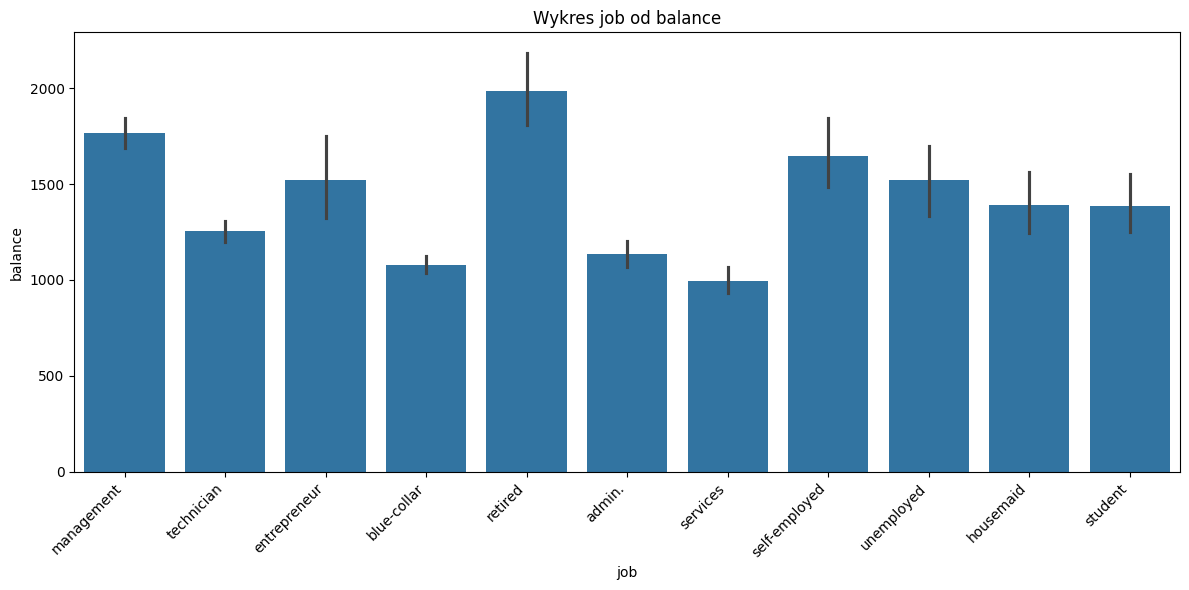

In [16]:
def plot_barplot(df,x,y):
  plt.figure(figsize=(12, 6))
  sns.barplot(x=x, y=y, data=df)
  plt.title("Wykres "+x+" od "+y)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

plot_barplot(bank_marketing_df,'job','balance')

In [17]:
##dobra chyba edukacja i praca nam malo daja
##to jak emeryci maja tyle sprawdze z wiekiem wsm
#powa of emeryci

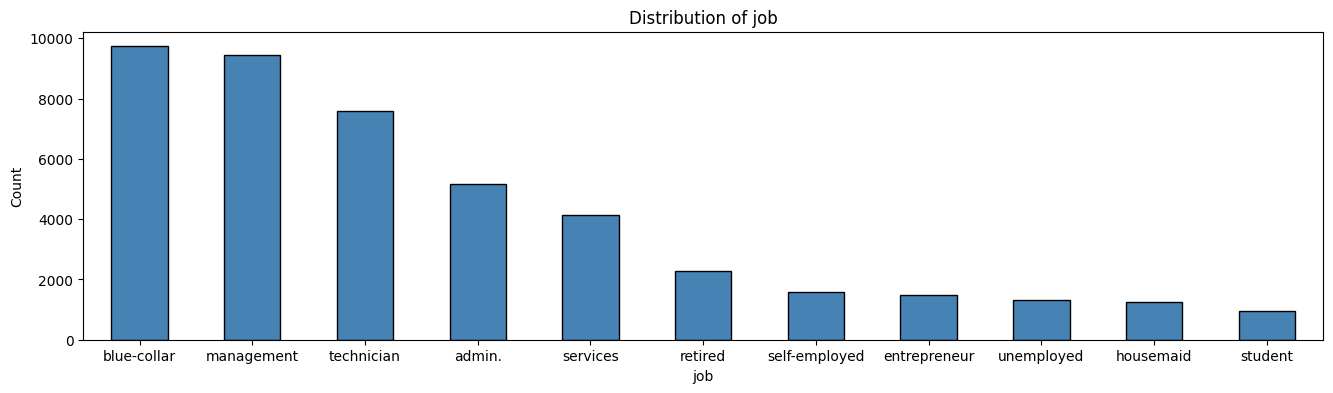

In [18]:
def plot_categorical_column(df, column_name):
    counts = df[column_name].value_counts()

    plt.figure(figsize=(16, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

plot_categorical_column(bank_marketing_df,'job')


In [19]:
#dobra czyli blue collar mocno wplywa bo oni nie lubia dawac peniadze na lokate a studenci i emeryci mimo ze nie liczni sa dosyc chetne

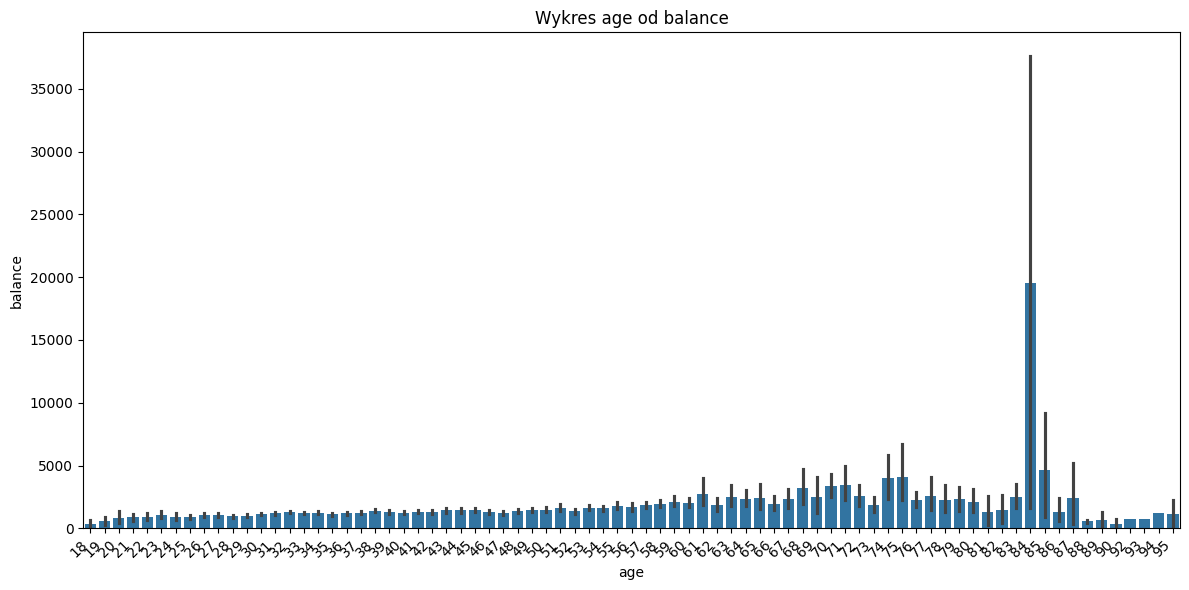

In [20]:
plot_barplot(bank_marketing_df,'age','balance')

In [21]:
osoby_w_wieku_85 = bank_marketing_df[bank_marketing_df['age'] == 85]
print(osoby_w_wieku_85)

       age      job   marital education  default  balance  housing  loan  \
31055   85  retired   married   primary        0    12114        0     0   
31130   85  retired  divorced   primary        0     7613        0     0   
34128   85  retired   married   primary        0       98        0     0   
42619   85  retired   married      <NA>        0     1934        0     0   
42690   85  retired   married   primary        0     1255        0     0   

         contact  day_of_week month  duration  campaign  pdays  previous  \
31055  telephone           12   feb       165         2     -1         0   
31130   cellular           18   feb       355         3     -1         0   
34128   cellular           30   apr       416         1     -1         0   
42619  telephone           12   jan       140         1     -1         0   
42690   cellular           15   jan       233         3     -1         0   

      poutcome  y  fin_problems  
31055     <NA>  1             0  
31130     <NA>  1 

In [22]:
#dogate dziady out
#dobra trzeba uzupełniać juz poutcome i job jakk tam wyglada z jon

In [23]:
missing_cols_mi = get_percentage_missing(bank_marketing_df, axis=0)
missing_cols_mi

,0
job,0.64
education,4.11
contact,28.80
poutcome,81.75


In [24]:
bank_marketing_df = bank_marketing_df.drop(['education','contact','duration','day_of_week'], axis=1, errors='ignore')
##polaczyc ze byl wgl kontakt a nie ile dni, ma housin g i loan,

In [25]:
bank_marketing_df.head(5)

,age,job,marital,default,balance,housing,loan,month,campaign,pdays,previous,poutcome,y,fin_problems
0,58,management,married,0,2143,1,0,may,1,-1,0,<NA>,0,0
1,44,technician,single,0,29,1,0,may,1,-1,0,<NA>,0,0
2,33,entrepreneur,married,0,2,1,1,may,1,-1,0,<NA>,0,0
3,47,blue-collar,married,0,1506,1,0,may,1,-1,0,<NA>,0,0
4,33,<NA>,single,0,1,0,0,may,1,-1,0,<NA>,0,0


In [26]:
#jo chyba dziala ogolnie te braki tam gdzie niski bilans daje blue collar jak najbardziej rozpowszechcnione a jesli sa wielsze to daje managmenta

In [27]:
bank_marketing_df['has_loan'] = bank_marketing_df.apply(lambda x: 1 if x['housing'] > 0 or x['loan'] > 0 else 0, axis=1)
# a to teraz moge out loan i housing
bank_marketing_df = bank_marketing_df.drop(['loan','housing'], axis=1, errors='ignore')
bank_marketing_df.head(5)
#campaign to ile razy dzwonili a pdays ile dni temu

,age,job,marital,default,balance,month,campaign,pdays,previous,poutcome,y,fin_problems,has_loan
0,58,management,married,0,2143,may,1,-1,0,<NA>,0,0,1
1,44,technician,single,0,29,may,1,-1,0,<NA>,0,0,1
2,33,entrepreneur,married,0,2,may,1,-1,0,<NA>,0,0,1
3,47,blue-collar,married,0,1506,may,1,-1,0,<NA>,0,0,1
4,33,<NA>,single,0,1,may,1,-1,0,<NA>,0,0,0


In [28]:
# chyba zrobie was contacted previous bo te p days ma tyle brakow a nic nie daje wsm zbytnio a jeszcze mamy previous
bank_marketing_df['was_contacted'] = bank_marketing_df.apply(lambda x: 1 if x['previous'] > 0 or x['pdays'] > 0 else 0, axis=1)
# a to teraz moge out loan i housing
bank_marketing_df = bank_marketing_df.drop(['pdays','previous'], axis=1, errors='ignore')
bank_marketing_df.head(5)

,age,job,marital,default,balance,month,campaign,poutcome,y,fin_problems,has_loan,was_contacted
0,58,management,married,0,2143,may,1,<NA>,0,0,1,0
1,44,technician,single,0,29,may,1,<NA>,0,0,1,0
2,33,entrepreneur,married,0,2,may,1,<NA>,0,0,1,0
3,47,blue-collar,married,0,1506,may,1,<NA>,0,0,1,0
4,33,<NA>,single,0,1,may,1,<NA>,0,0,0,0


In [29]:
bank_marketing_df['is_single'] = bank_marketing_df.apply(
    lambda x: 1 if x['marital'] == 'married' else 0,
    axis=1
)
bank_marketing_df = bank_marketing_df.drop(['marital'], axis=1, errors='ignore')
bank_marketing_df.head(5)

,age,job,default,balance,month,campaign,poutcome,y,fin_problems,has_loan,was_contacted,is_single
0,58,management,0,2143,may,1,<NA>,0,0,1,0,1
1,44,technician,0,29,may,1,<NA>,0,0,1,0,0
2,33,entrepreneur,0,2,may,1,<NA>,0,0,1,0,1
3,47,blue-collar,0,1506,may,1,<NA>,0,0,1,0,1
4,33,<NA>,0,1,may,1,<NA>,0,0,0,0,0


In [30]:
# to jescze to nieszczesne poutcome ale jest wazne niestety, z month na razie nie wiem moze na humor wplywa idk zostawimy na razie

In [31]:
#dobra na razie tylko usuwalam a teraz dopiero podzielie przed uzupelnianiem

In [32]:
#jescze wszystko trzeba na kategorie

In [33]:
mapowanie_miesiecy = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
bank_marketing_df['month'] = bank_marketing_df['month'].map(mapowanie_miesiecy)

In [34]:
#jeszcze poutcome
bank_marketing_df['poutcome'] = bank_marketing_df['poutcome'].fillna('unknown')


In [35]:
bank_marketing_df['poutcome'].unique()

<StringArray>
['unknown', 'failure', 'other', 'success']
Length: 4, dtype: string

In [36]:
mapowanie_poutcome = {
    'failure': -1,
    'unknown': 0,
    'success': 1,
    'other': 0
}

bank_marketing_df['poutcome'] = bank_marketing_df['poutcome'].map(mapowanie_poutcome)
bank_marketing_df['poutcome'] = bank_marketing_df['poutcome'].astype(int)


In [37]:
def plot_correlation_matrix(df):


    corr = df.corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [38]:
bank_marketing_df.head(5)

,age,job,default,balance,month,campaign,poutcome,y,fin_problems,has_loan,was_contacted,is_single
0,58,management,0,2143,5,1,0,0,0,1,0,1
1,44,technician,0,29,5,1,0,0,0,1,0,0
2,33,entrepreneur,0,2,5,1,0,0,0,1,0,1
3,47,blue-collar,0,1506,5,1,0,0,0,1,0,1
4,33,<NA>,0,1,5,1,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

X_data = bank_marketing_df.drop('y', axis=1)
y_data = bank_marketing_df['y']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    random_state=42,
    stratify=y_data
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_train_val
)

In [40]:

zaw_w = 'management'
zaw_n = 'blue-collar'

prog = X_train[X_train['job'].isin([zaw_w, zaw_n])]['balance'].mean()

def imputuj_zaw(df):
    braki_idx = df[df['job'].isnull()].index
    df.loc[braki_idx, 'job'] = df.loc[braki_idx].apply(
        lambda row: zaw_w if row['balance'] >= prog else zaw_n,
        axis=1
    )
    return df

X_train = imputuj_zaw(X_train)
X_test = imputuj_zaw(X_test)
X_val=imputuj_zaw(X_val)

In [41]:
X_train.head(5)

,age,job,default,balance,month,campaign,poutcome,fin_problems,has_loan,was_contacted,is_single
10333,43,services,0,2478,6,1,0,0,1,0,1
9723,40,blue-collar,0,676,6,1,0,0,0,0,1
22764,39,technician,0,3825,8,6,0,0,1,0,1
23223,42,technician,0,324,8,2,0,0,1,0,0
5594,31,blue-collar,0,631,5,4,0,0,1,0,1


/tmp/ipython-input-1866390597.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


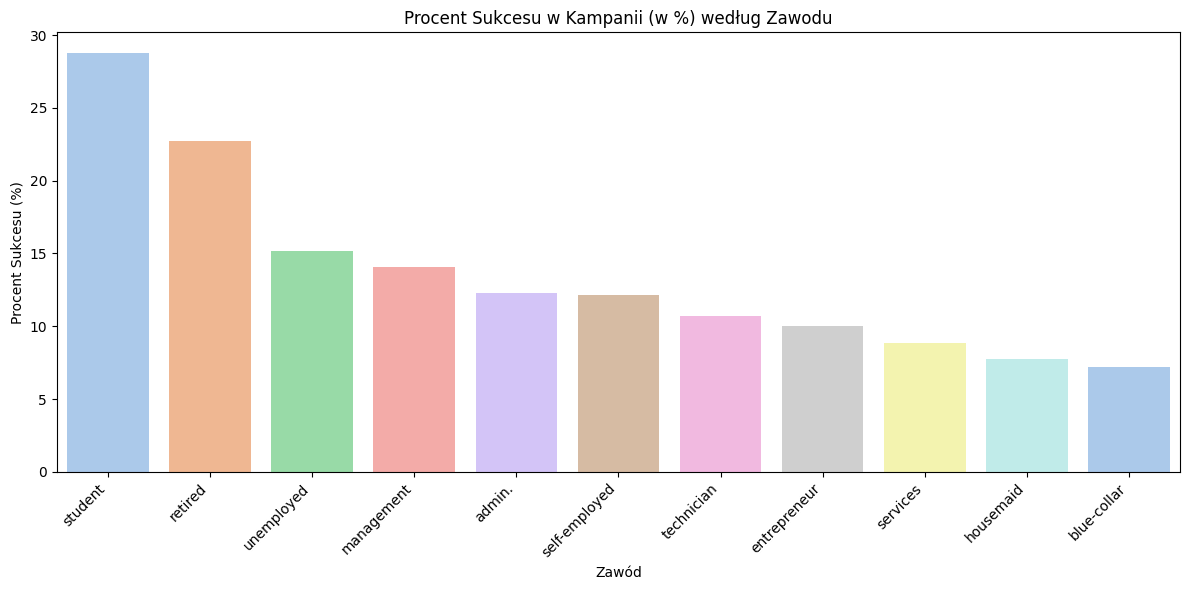

In [42]:
df_temp = pd.DataFrame({'job': X_train['job'], 'y': y_train})
success_rate = df_temp.groupby('job')['y'].mean().reset_index()
success_rate.columns = ['job', 'success_rate']
success_rate['success_rate'] = success_rate['success_rate'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(
    data=success_rate,
    x='job',
    y='success_rate',
    palette='pastel',
    order=success_rate.sort_values('success_rate', ascending=False)['job']
)

plt.title('Procent Sukcesu w Kampanii (w %) według Zawodu')
plt.xlabel('Zawód')
plt.ylabel('Procent Sukcesu (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
X_train = pd.get_dummies(X_train, columns=['job'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['job'], drop_first=False)
X_val = pd.get_dummies(X_val, columns=['job'], drop_first=False)

X_train=X_train.astype(int)
X_test=X_test.astype(int)
X_val=X_val.astype(int)

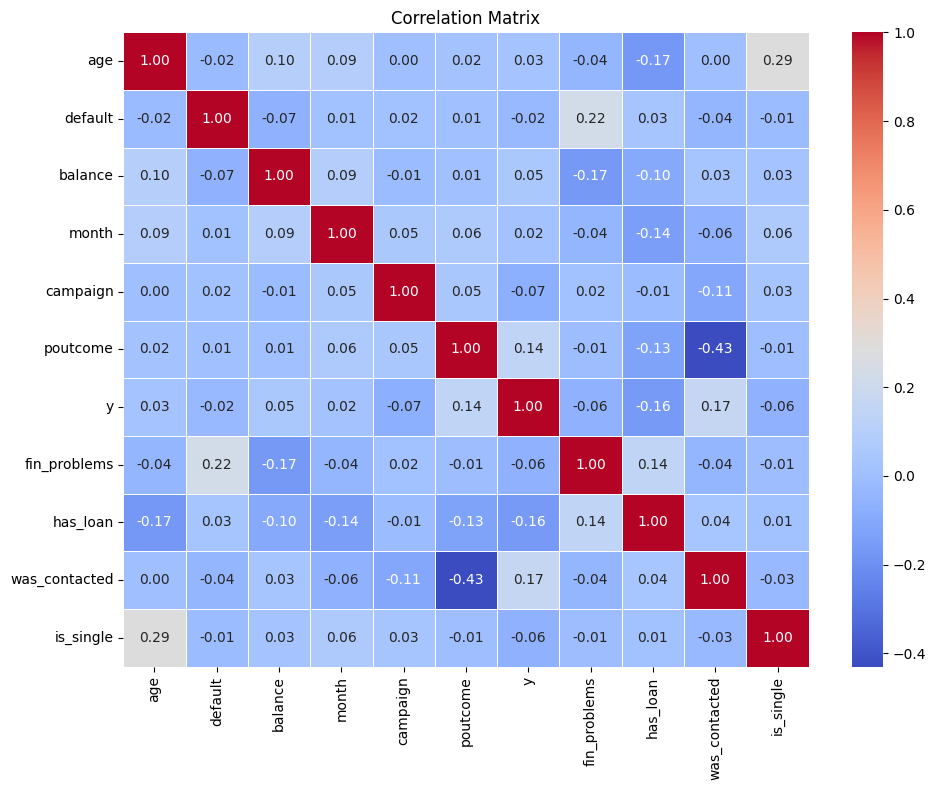

In [44]:
X_bez_job = bank_marketing_df.copy()
X_bez_job.drop('job', axis=1, inplace=True)
plot_correlation_matrix(X_bez_job)

Dobra taka mieszanina ze sie sama zgubilam niestety.....


--studenci i emeryci lubia lokaty , a blue collar nie

--to czy z osoba sie kontaktowali ma mocny wplyw na y

--osoby z porzyczka czy kredytem maja mniejsze szanse na y

--poprzednia kampania lekko wplywa teżżż, mimo za malej ilosci danych

--staruszki sa samotni


In [45]:
X_train.head()

,age,default,balance,month,campaign,poutcome,fin_problems,has_loan,was_contacted,is_single,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
10333,43,0,2478,6,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
9723,40,0,676,6,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
22764,39,0,3825,8,6,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
23223,42,0,324,8,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5594,31,0,631,5,4,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [46]:
X_train.isna().sum()

,0
age,0
default,0
balance,0
month,0
campaign,0
poutcome,0
fin_problems,0
has_loan,0
was_contacted,0
is_single,0


In [47]:
X_train.dtypes

,0
age,int64
default,int64
balance,int64
month,int64
campaign,int64
poutcome,int64
fin_problems,int64
has_loan,int64
was_contacted,int64
is_single,int64


In [48]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report

In [49]:
from sklearn.dummy import DummyClassifier
model_dummy = DummyClassifier(strategy = 'uniform')
model_dummy.fit(X_train, y_train)
y_pred = model_dummy.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.49      0.63      7985
           1       0.11      0.49      0.18      1058

    accuracy                           0.49      9043
   macro avg       0.50      0.49      0.41      9043
weighted avg       0.79      0.49      0.58      9043



array([[3921, 4064],
       [ 543,  515]])

Tyle zdazylam przepraszam ale byli problemy przez caly tydzien i wsm czas i sily sie pojawily dopiero wczoraj weic polecialam nadrabiac studia wtedy :/

Dobra robie najlzejsze bo juz mialam trzy wymagane a nie zachowalam 🤡
a trzeba szybko  nadrobic bo dalsze listy ciekawsze

#MLP

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
param_range = np.logspace(-5, 2, 8)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('resample', RandomOverSampler(random_state=42)),
    ('mlp', MLPClassifier(max_iter=500, random_state=42))
])

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

param_dist = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__alpha': np.logspace(-3,1,10)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring = 'f1_weighted'
)

search.fit(X_train, y_train)

print(f"Najlepsze parametry: {search.best_params_}")

Najlepsze parametry: {'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (50,), 'mlp__alpha': np.float64(0.46415888336127775)}


In [56]:
mlp = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resample', RandomOverSampler(random_state=42)),
    ('logreg', MLPClassifier(
        hidden_layer_sizes = (50,50),
        learning_rate_init = 0.006259,
        alpha=0.464158,
        random_state=42
    ))
])


mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)
print(classification_report(y_val, y_pred))
confusion_matrix(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7984
           1       0.27      0.60      0.37      1058

    accuracy                           0.76      9042
   macro avg       0.60      0.69      0.61      9042
weighted avg       0.86      0.76      0.80      9042



array([[6243, 1741],
       [ 419,  639]])

# Random forest


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20,30],
    'min_samples_leaf': [1, 2, 5, 10]
}


grid_rf = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_grid,
    n_iter=15,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='f1_weighted'
)

grid_rf.fit(X_train, y_train)

print(f"Najlepsze parametry: {grid_rf.best_params_}")
print(f"Najlepszy wynik (CV): {grid_rf.best_score_:.4f}")


best_model = grid_rf.best_estimator_

Najlepsze parametry: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': None}
Najlepszy wynik (CV): 0.8687


In [58]:
best_n_estimators = grid_rf.best_params_['n_estimators']
best_max_depth = grid_rf.best_params_['max_depth']
best_samples_leaf = grid_rf.best_params_['min_samples_leaf']
forest = RandomForestClassifier(class_weight='balanced',random_state=42,n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_leaf=best_samples_leaf).fit(X_train, y_train)
y_pred=forest.predict(X_val)
print(classification_report(y_val, y_pred))
confusion_matrix(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7984
           1       0.48      0.34      0.40      1058

    accuracy                           0.88      9042
   macro avg       0.70      0.65      0.67      9042
weighted avg       0.87      0.88      0.87      9042



array([[7597,  387],
       [ 694,  364]])

#SHAP FOrest

In [59]:
!pip install shap

Próbka pozytywna:


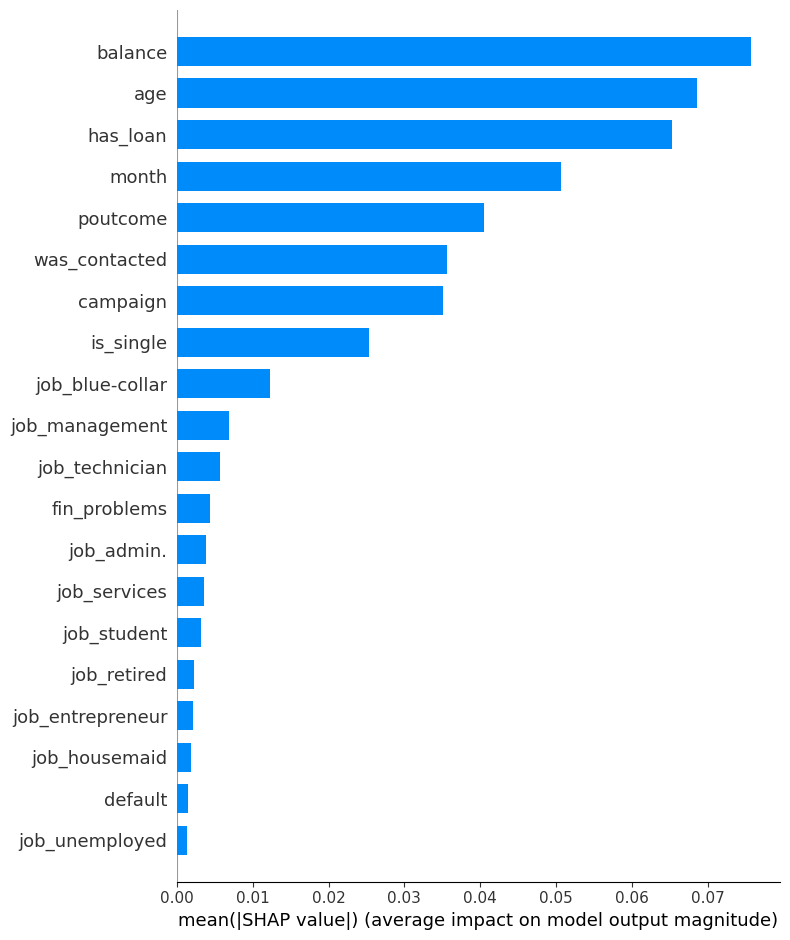

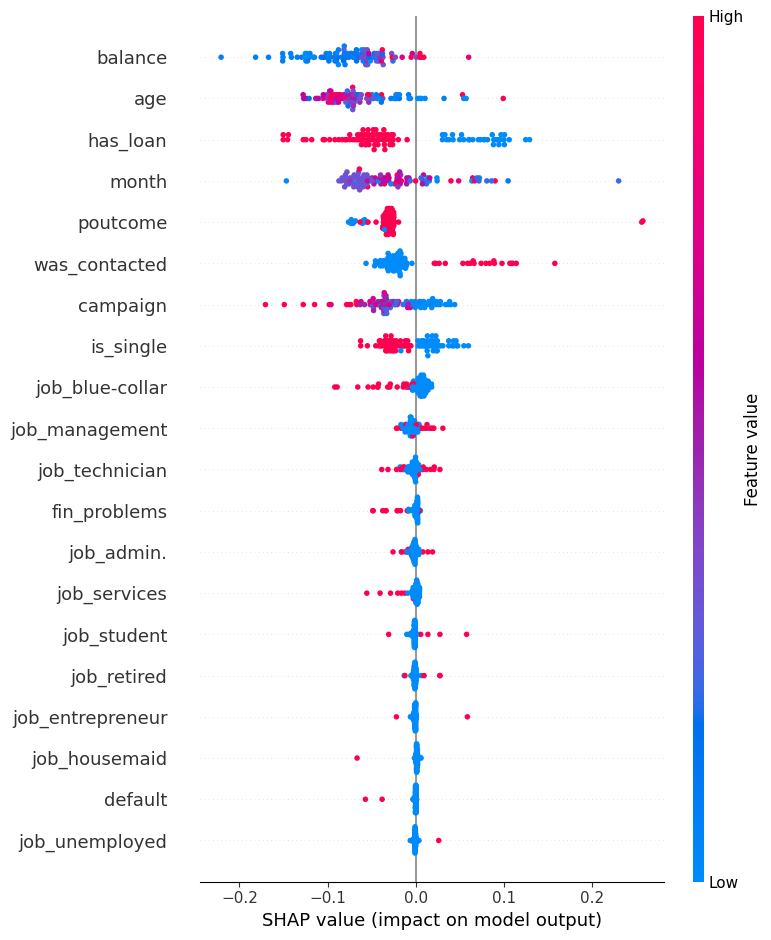

Próbka negatywna:


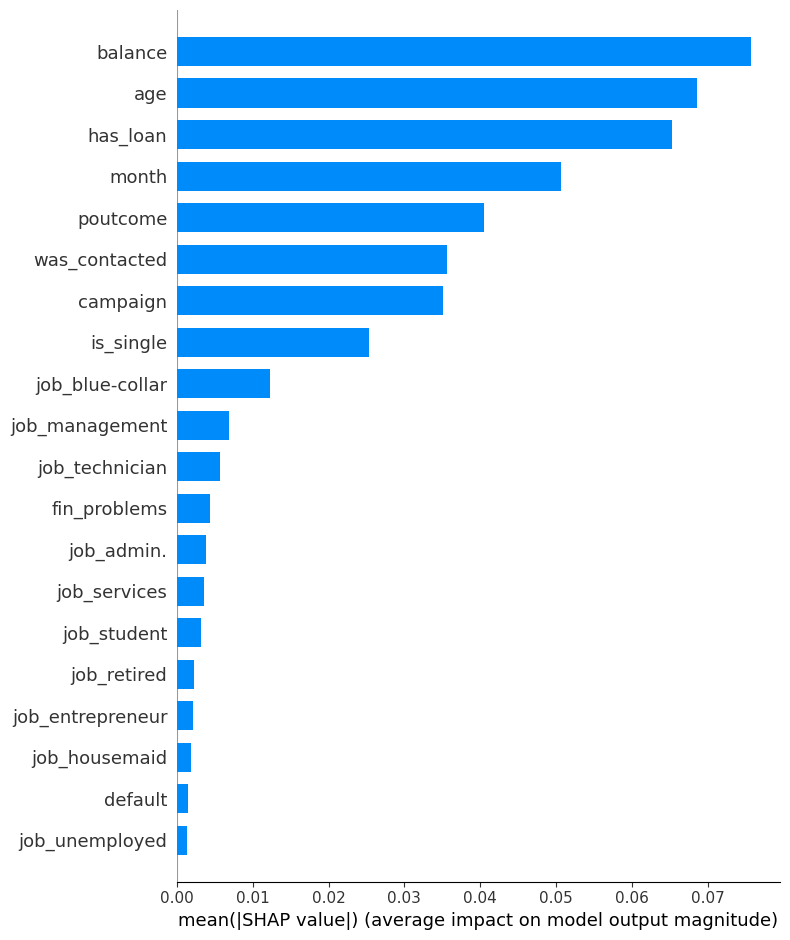

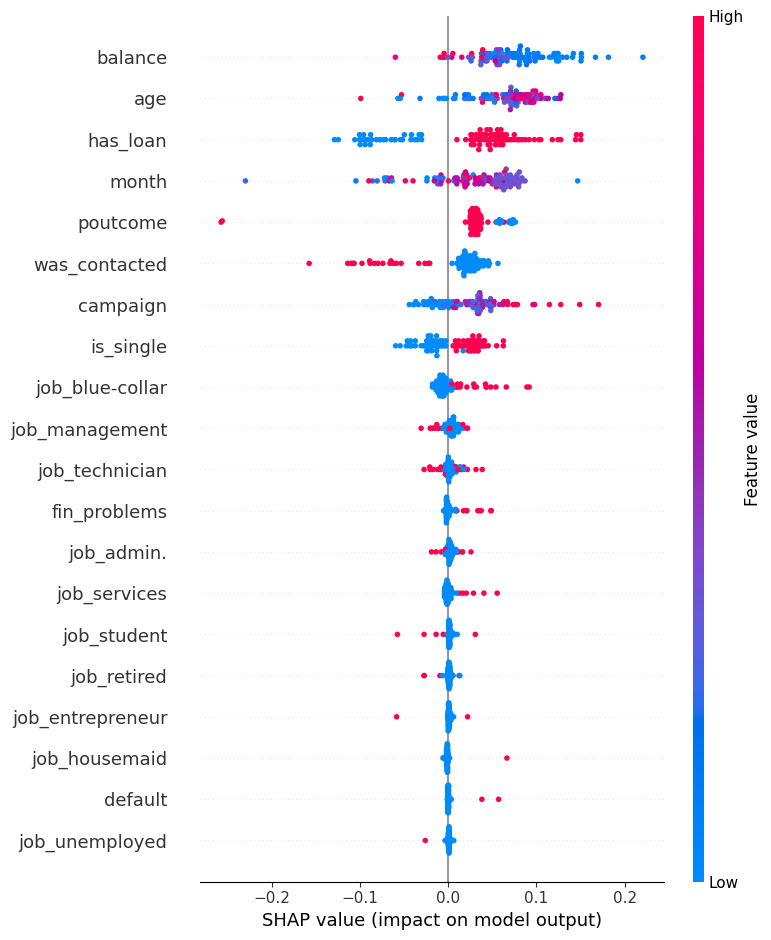

In [60]:
import shap

X_val_sample = X_val.sample(n=100, random_state=42)


explainer = shap.TreeExplainer(forest)

shap_values = explainer.shap_values(X_val_sample)

print("Próbka pozytywna:")
shap.summary_plot(shap_values[:,:,1], X_val_sample, plot_type="bar")
shap.summary_plot(shap_values[:,:,1], X_val_sample)
print("Próbka negatywna:")
shap.summary_plot(shap_values[:,:,0], X_val_sample, plot_type="bar")
shap.summary_plot(shap_values[:,:,0], X_val_sample)

#Regresja liniowa

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

pipeline_lr = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resample', RandomOverSampler(random_state=42)),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train, y_train)

print(f"Najlepsze parametry: {grid_lr.best_params_}")
print(f"Najlepszy wynik: {grid_lr.best_score_:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Najlepsze parametry: {'logreg__C': 1, 'logreg__penalty': 'l2'}
Najlepszy wynik: 0.7538


In [62]:
lr = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resample', RandomOverSampler(random_state=42)),
    ('logreg', LogisticRegression(
        solver='liblinear',
        C=1,
        penalty='l2',
        random_state=42
    ))
])


lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print(classification_report(y_val, y_pred))
confusion_matrix(y_val, y_pred)


              precision    recall  f1-score   support

           0       0.93      0.72      0.81      7984
           1       0.22      0.62      0.33      1058

    accuracy                           0.71      9042
   macro avg       0.58      0.67      0.57      9042
weighted avg       0.85      0.71      0.75      9042



array([[5725, 2259],
       [ 407,  651]])